In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Name- Vineet Kumar
## Enrollment no. 23572016

#  Exploratory Data Analysis

##  1.Analysis

1.Univariate Analysis

2. Multivariate Analysis

##  2.Feature Engineering

1.Creating new columns

2.Modifying existing ones

##  3.Handling Outliers


1.Detect Outliers

2. Remove Outliers

In [104]:
## importing the dataset
df = pd.read_csv("train.csv")

In [105]:
#shape
df.shape

(891, 12)

In [106]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# Listing down the colums
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#  Categorical Columns

. Survived

.Pclass

.SEX

.Sibsp

.parch

.embarked

#  Numerical Columns

.Age

. Fare 

. Passengerid

#  Mixed columns

.Name

.Ticket

.cabin


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few Conclusions

1. Missing values in Age , cabin and  Embarked columns

2.More then 70 percent values are missing in  cabin columns, will have to drop

3.Few columns have inappropriate types

In [110]:
# Droppping cabin column 

df.drop(columns=['Cabin'],inplace=True)

In [111]:
# imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\1464378475.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [112]:
# imputing missing values for Embarked

#finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('s', inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\942621561.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('s', inplace=True)


In [113]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [114]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [115]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [117]:
#Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


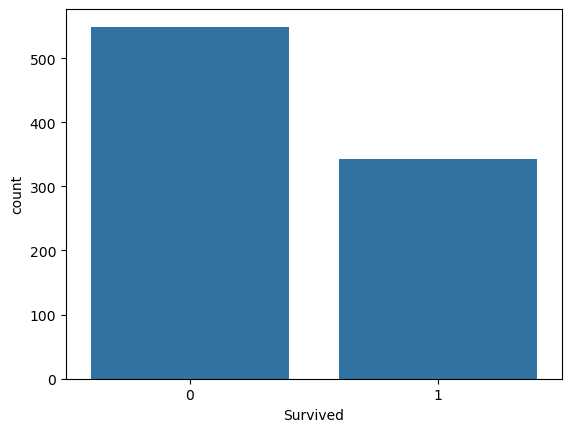

In [118]:
# Univariate Analysis
# let's start with the Survived col

sns.countplot(x=df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

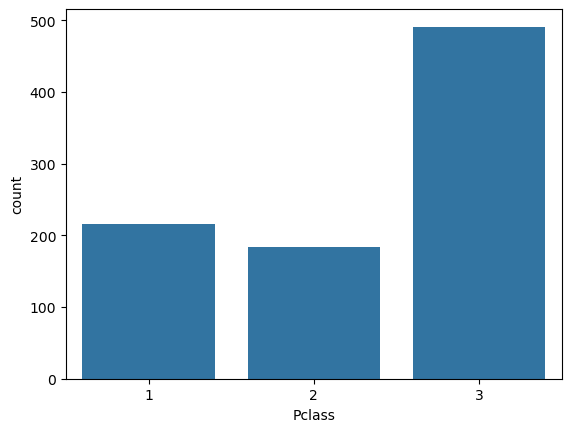

In [119]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x=df['Pclass'])

## Conclusion: Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

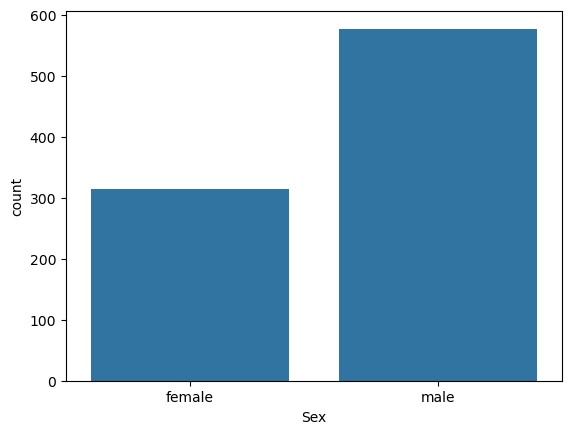

In [120]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x=df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

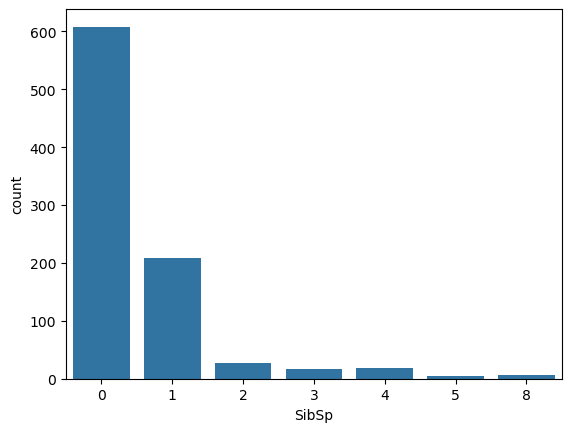

In [121]:
print(df['SibSp'].value_counts())

sns.countplot(x=df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

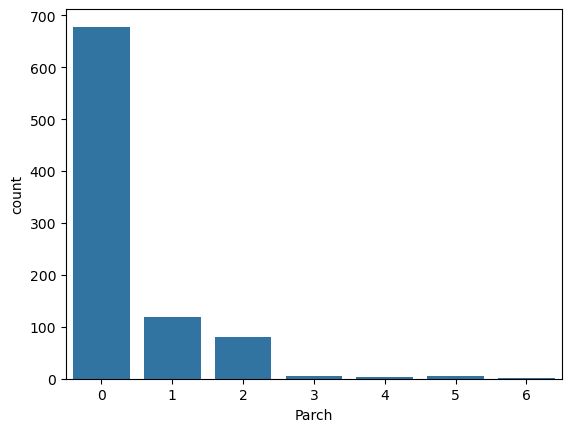

In [122]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x=df['Parch'])

Embarked
S    72.278339
C    18.855219
Q     8.641975
s     0.224467
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

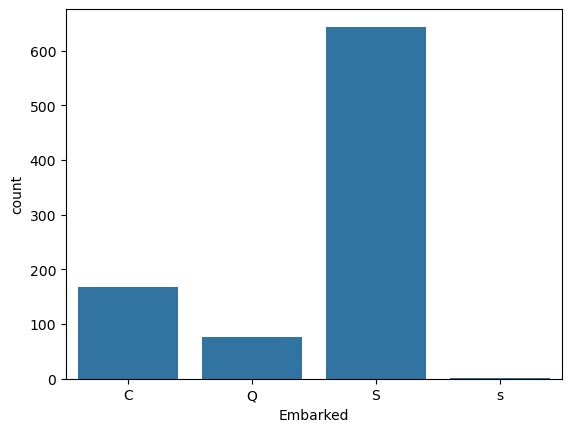

In [123]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x=df['Embarked'])

0.45956263424701577
0.9865867453652877


C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\2599703392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


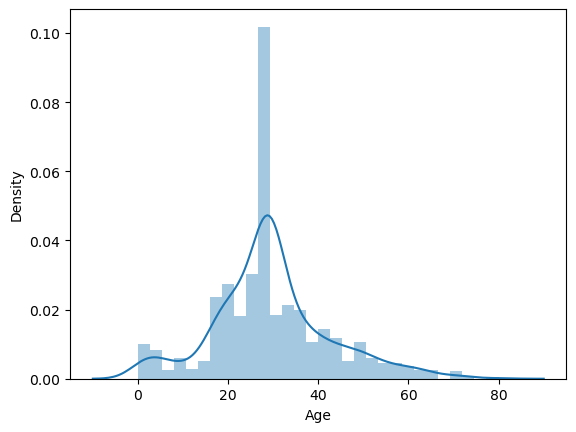

In [124]:
# Age column
sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: ylabel='Age'>

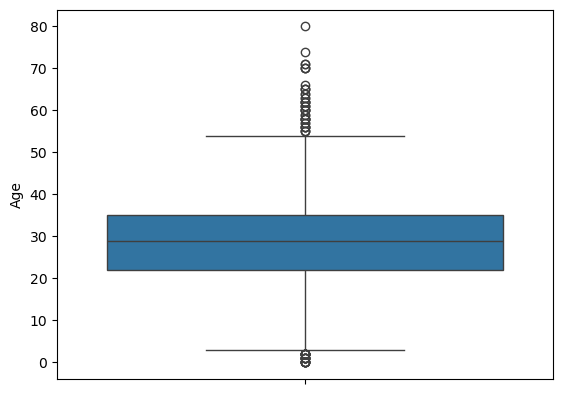

In [125]:
sns.boxplot(df['Age'])

In [126]:
#just out of curiosity

print('People with age in between 60 and 70 are',df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('People with age greater then 70 and 75 are',df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('People with age greater then 75 are',df[df['Age']>75].shape[0])

print('-'*50)

print('People with age between 0 and 1',df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater then 70 and 75 are 6
People with age greater then 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

. For all practical purposes age can be considered as normal distribution

. Deeper analysis is reuired for outlier detection

C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\994005423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

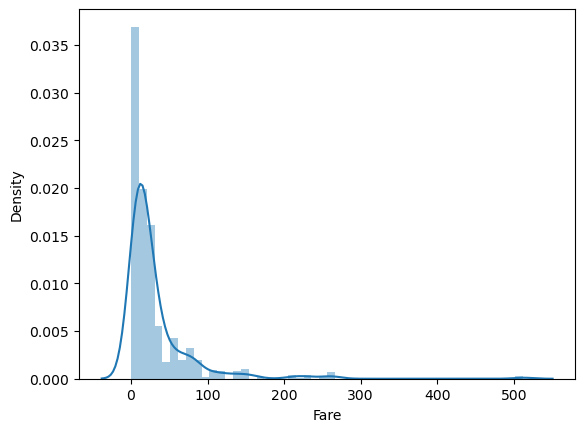

In [127]:
# fare column

sns.distplot(df['Fare'])

In [128]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

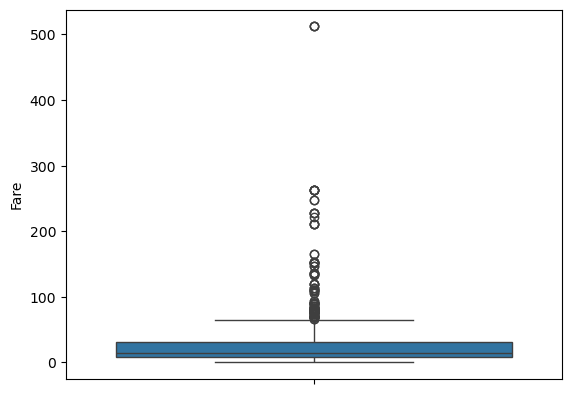

In [129]:
sns.boxplot(df['Fare'])

In [130]:
print('people with fare in between $200 and $300',df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('people with fare in greater then $300',df[df['Fare']>300].shape[0])

people with fare in between $200 and $300 17
people with fare in greater then $300 3


##  Conclusion

. Highly skewed data, a lot of people had cheaper tickets

. Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


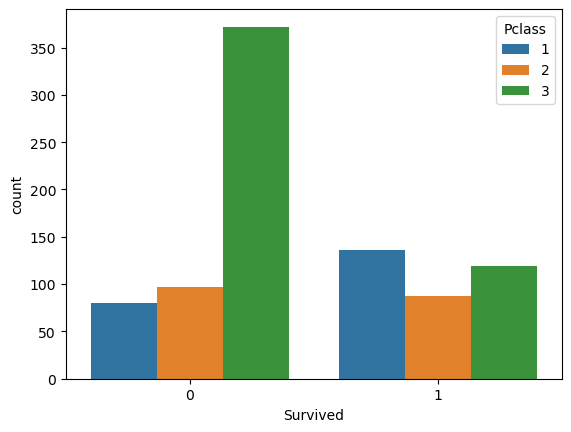

In [131]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x=df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


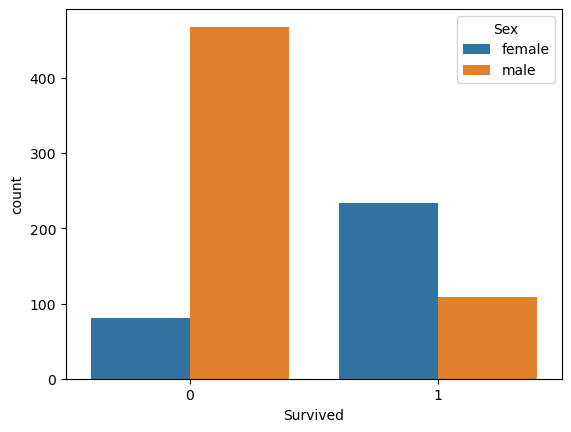

In [132]:
# Survival with Sex

sns.countplot(x=df['Survived'], hue=df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7
s,0.0,100.0


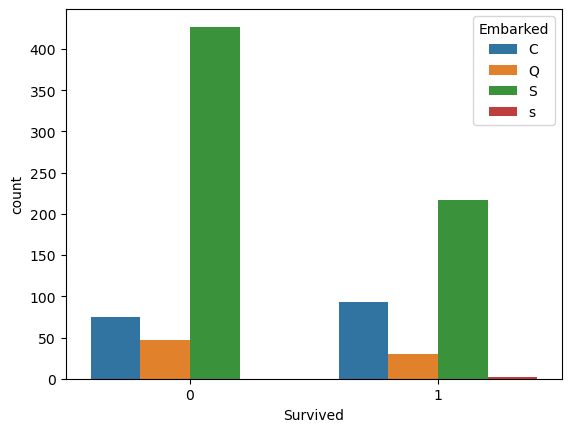

In [133]:
# Survival with Embarked

sns.countplot(x=df['Survived'], hue=df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\4035758269.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\4035758269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

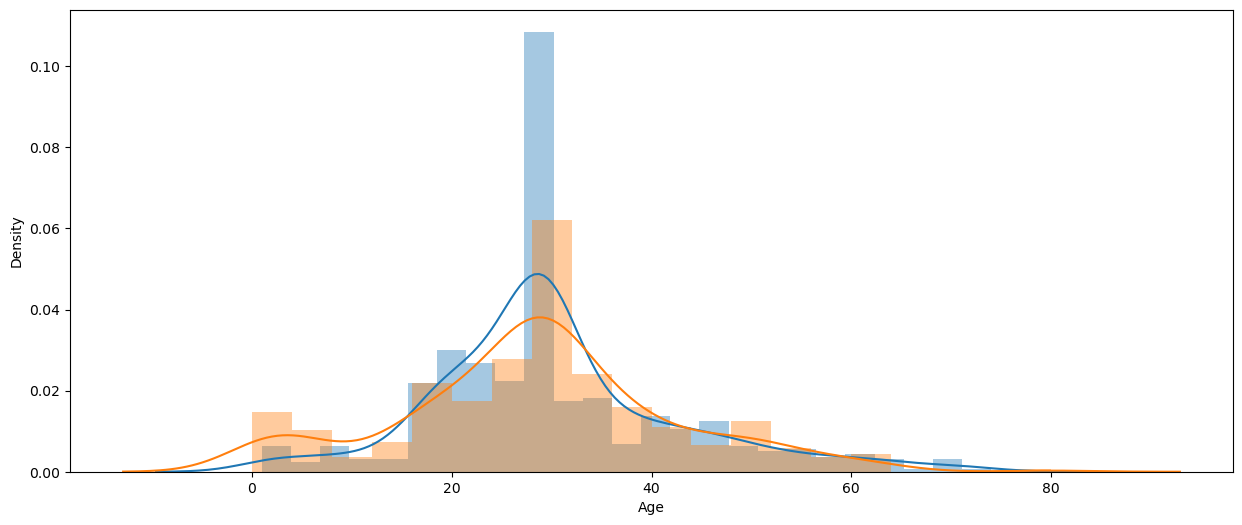

In [134]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\1419208532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\LOQ\AppData\Local\Temp\ipykernel_5252\1419208532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

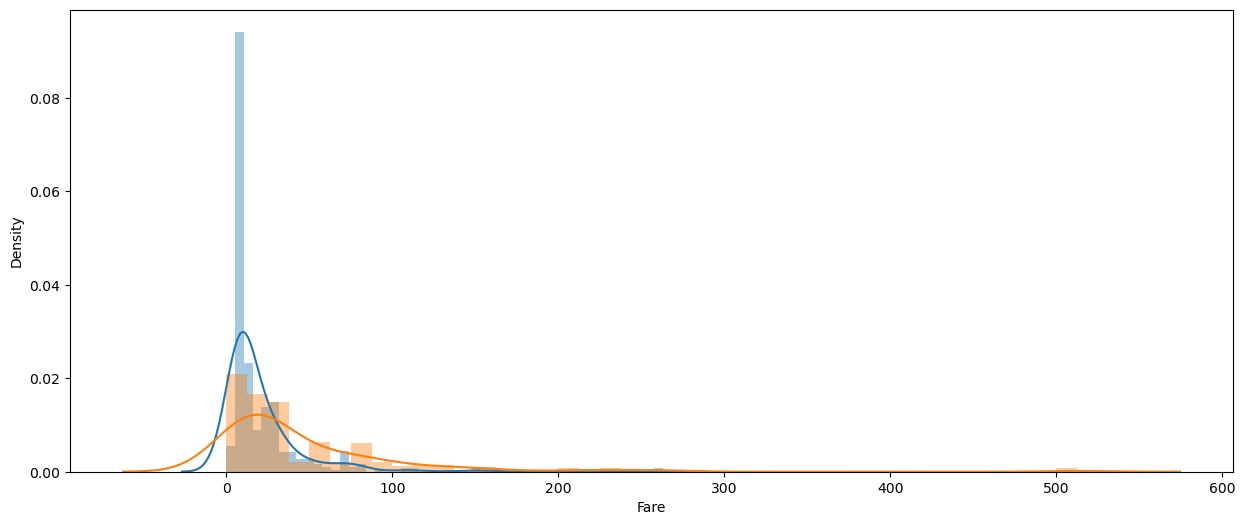

In [135]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

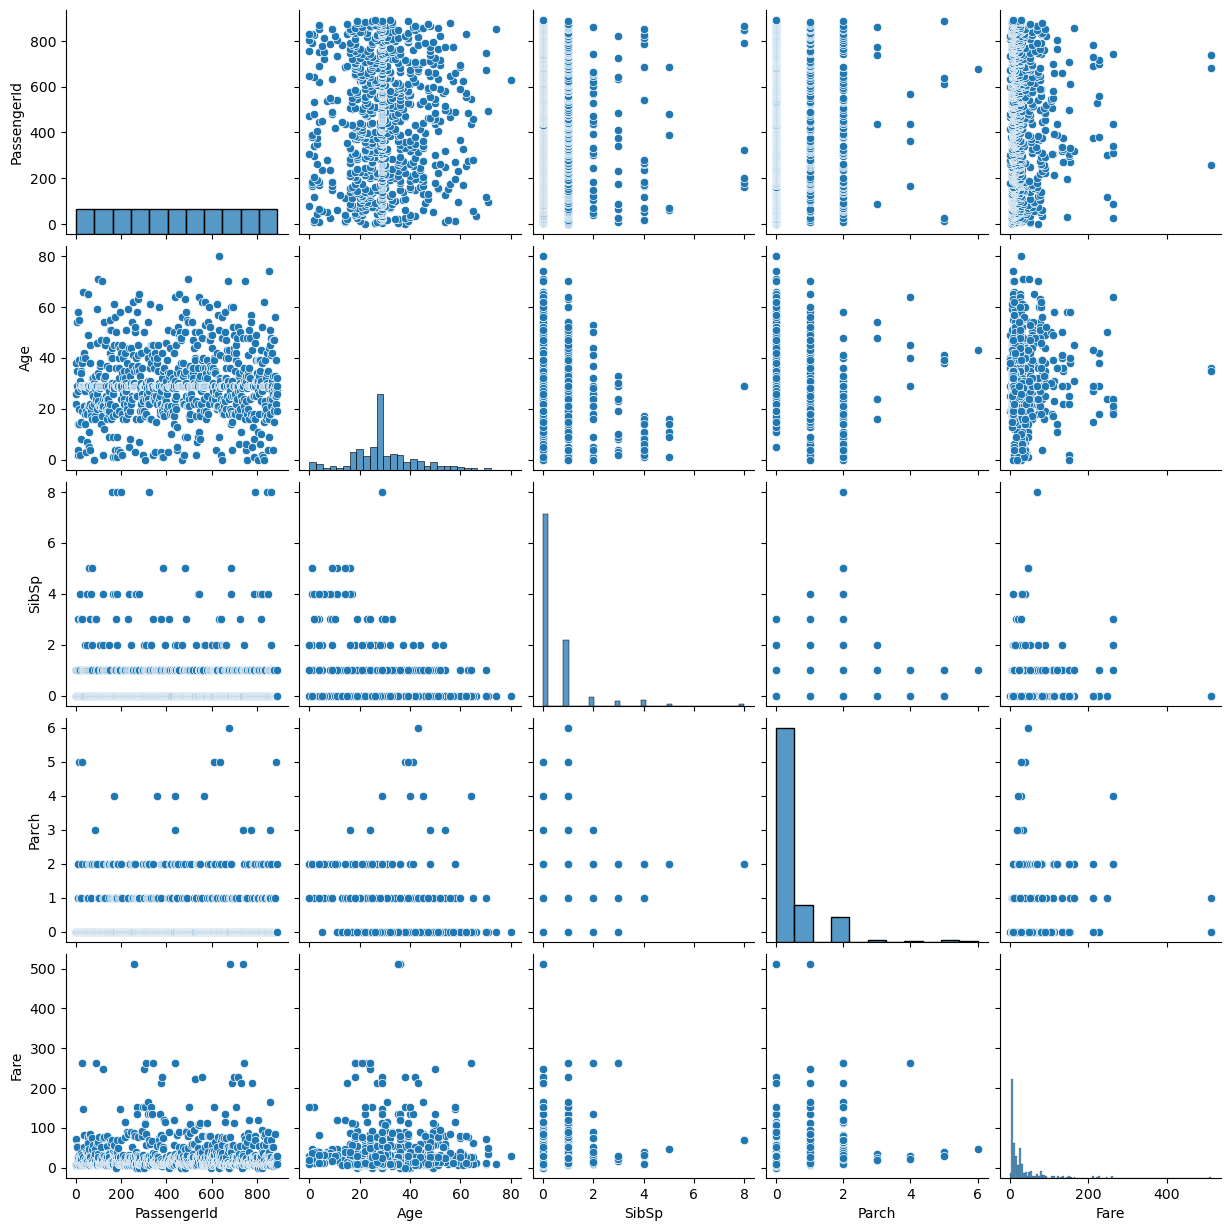

In [136]:
sns.pairplot(df)

<Axes: >

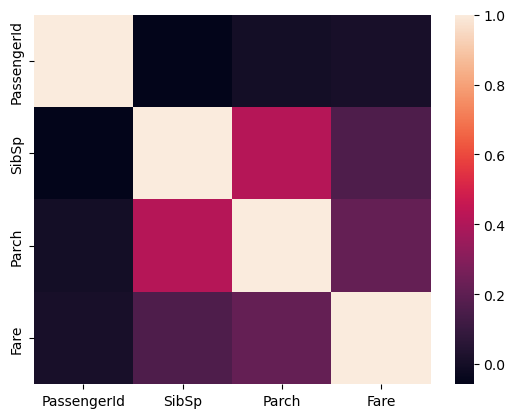

In [137]:
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_df.corr())


In [138]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [139]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,S,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0.0000,S,0
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,14.4542,C,1
352,353,0,3,"Elias, Mr. Tannous",male,15,1,1,2695,7.2292,C,2
677,678,1,3,"Turja, Miss. Anna Sofia",female,18,0,0,4138,9.8417,S,0


In [140]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"
    

In [141]:
df['family_type']=df['family_size'].apply(family_type)

In [142]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,0,248747,13.0000,S,0,Alone
528,529,0,3,"Salonen, Mr. Johan Werner",male,39,0,0,3101296,7.9250,S,0,Alone
827,828,1,2,"Mallet, Master. Andre",male,1,0,2,S.C./PARIS 2079,37.0042,C,2,Medium
257,258,1,1,"Cherry, Miss. Gladys",female,30,0,0,110152,86.5000,S,0,Alone
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17,1,0,17474,57.0000,S,1,Medium


In [143]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [144]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48,PC 17572,76.7292,C,Medium
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,29,372622,7.7500,Q,Alone
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25,236853,26.0000,S,Medium
229,230,0,3,"Lefebre, Miss. Mathilde",female,29,4133,25.4667,S,Medium
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49,17465,25.9292,S,Alone


In [145]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


#  Detecting outliers

## Numerical data

. if the data is following normal distribution, anything beyond 3SD- mean + 3SD can be considered as an outlier

. if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1-1.5 IQR and Q3+1.5IQR

## Categorical data

.if the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female 

In [146]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [147]:
# handling outliers from Column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3-Q1)
outlier_high=Q3 + 1.5 * (Q3-Q1)

df= df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]


In [148]:
# One hot encoding

df.sample(4)

# cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)


,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Embarked_s,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False,False


In [149]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)


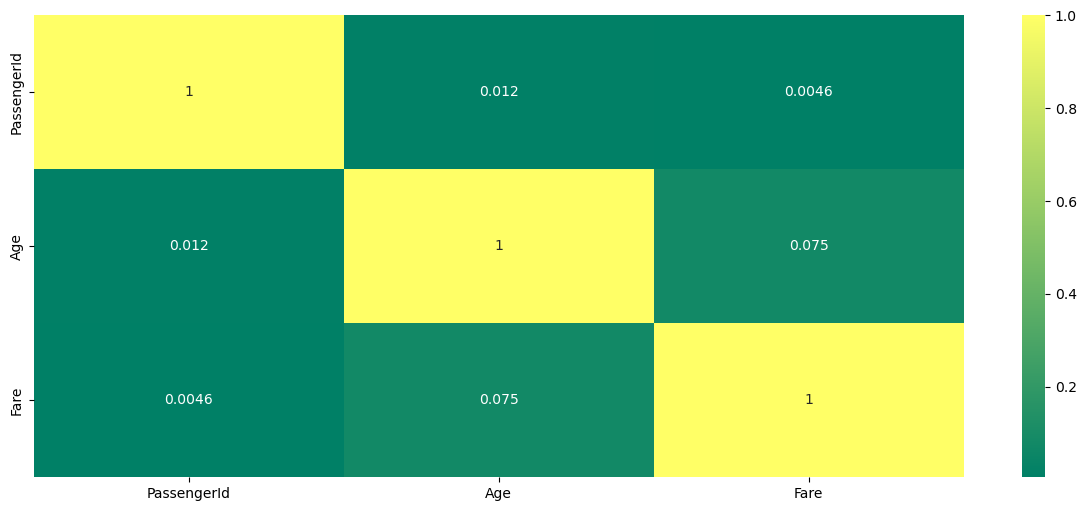

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Set figure size
plt.figure(figsize=(15,6))

# Create the heatmap
sns.heatmap(numeric_df.corr(), cmap='summer', annot=True)
plt.show()


#  Drawing Conclusions

. chance of female survival is heigher then male survival

. Somehow, people going to C survived more

. travelling in Pclass 3 was deadliest

.people in the age range of 20 to 40 had a higher chance of not surviving

. people travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large
 families and travelling alone